In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
import pickle
import json

In [4]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot:>

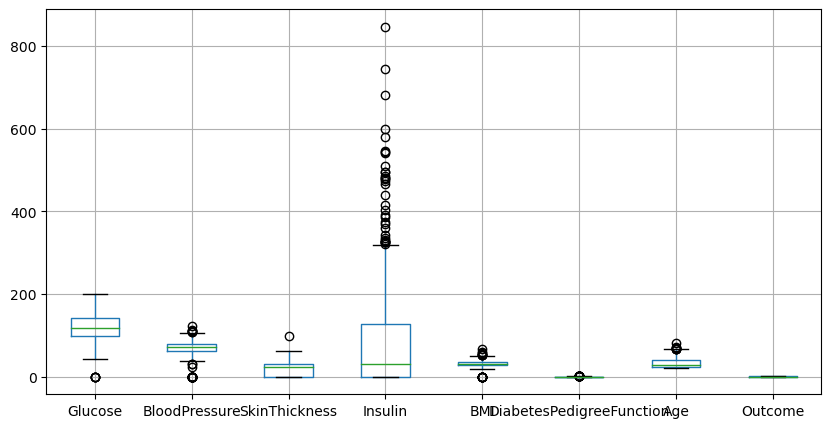

In [6]:
df.boxplot(figsize=(10,5))

In [7]:
np.sort(df["Insulin"].unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [8]:
a=np.where(df["Insulin"]>600)[0]
a.tolist()

[13, 228, 247]

In [9]:
df.drop(np.where(df["Insulin"]>600)[0].tolist(),axis=0,inplace=True)

In [10]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [11]:
df["Outcome"].value_counts()

0    498
1    267
Name: Outcome, dtype: int64

In [12]:
x = df.drop("Outcome",axis = 1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [13]:
x_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
704,110,76,20,100,28.4,0.118,27
698,127,88,11,155,34.5,0.598,28
158,88,74,19,53,29.0,0.229,22
540,100,74,40,215,39.4,0.661,43
484,145,0,0,0,44.2,0.630,31
...,...,...,...,...,...,...,...
699,118,70,0,0,44.5,0.904,26
144,154,62,31,284,32.8,0.237,23
473,136,90,0,0,29.9,0.210,50
275,100,70,52,57,40.5,0.677,25


# Model Training

In [14]:
model= KNeighborsClassifier() # k = 5, p= 2(Euclidean dist)
model.fit(x_train,y_train)

KNeighborsClassifier()

# Evaluation

In [15]:
#testing data

y_pred_test=model.predict(x_test)

con_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_test,y_pred_test)
print("accuracy_score: \n",accur_score)

report=classification_report(y_test,y_pred_test)
print("classification_report: \n",report)

Confusion matrix: 
 [[106  19]
 [ 37  30]]
accuracy_score: 
 0.7083333333333334
classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       125
           1       0.61      0.45      0.52        67

    accuracy                           0.71       192
   macro avg       0.68      0.65      0.65       192
weighted avg       0.70      0.71      0.70       192



In [16]:
#training data

y_pred_train=model.predict(x_train)

con_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score: \n",accur_score)

report=classification_report(y_train,y_pred_train)
print("classification_report: \n",report)

Confusion matrix: 
 [[331  42]
 [ 69 131]]
accuracy_score: 
 0.806282722513089
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       373
           1       0.76      0.66      0.70       200

    accuracy                           0.81       573
   macro avg       0.79      0.77      0.78       573
weighted avg       0.80      0.81      0.80       573



# Hyperparameter Tuning

In [17]:
knn=KNeighborsClassifier()

parameter={"n_neighbors":np.arange(1,30),
          "p":[1,2]}
gcv_kn = GridSearchCV(knn,parameter,cv=5)
gcv_kn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [18]:
gcv_kn.best_estimator_

KNeighborsClassifier(n_neighbors=28, p=1)

In [19]:
gcv_kn.best_params_

{'n_neighbors': 28, 'p': 1}

In [20]:
#testing data
knn_model=gcv_kn.best_estimator_

y_pred_test=knn_model.predict(x_test)

con_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_test,y_pred_test)
print("accuracy_score: \n",accur_score)

report=classification_report(y_test,y_pred_test)
print("classification_report: \n",report)

Confusion matrix: 
 [[114  11]
 [ 39  28]]
accuracy_score: 
 0.7395833333333334
classification_report: 
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       125
           1       0.72      0.42      0.53        67

    accuracy                           0.74       192
   macro avg       0.73      0.66      0.67       192
weighted avg       0.74      0.74      0.72       192



In [21]:
#training data

y_pred_train=knn_model.predict(x_train)

con_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score: \n",accur_score)

report=classification_report(y_train,y_pred_train)
print("classification_report: \n",report)

Confusion matrix: 
 [[340  33]
 [109  91]]
accuracy_score: 
 0.7521815008726004
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       373
           1       0.73      0.46      0.56       200

    accuracy                           0.75       573
   macro avg       0.75      0.68      0.69       573
weighted avg       0.75      0.75      0.73       573



# Scaling

In [22]:
x.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,120.922876,69.060131,20.492810,77.145098,31.962353,0.469604,33.226144
std,31.691462,19.388196,15.962866,107.279598,7.863185,0.325085,11.738193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243000,24.000000
50%,117.000000,72.000000,23.000000,25.000000,32.000000,0.370000,29.000000
75%,142.000000,80.000000,32.000000,126.000000,36.500000,0.626000,41.000000
max,199.000000,122.000000,99.000000,600.000000,67.100000,2.420000,81.000000


In [23]:
scale=MinMaxScaler()
x_norm_array=scale.fit_transform(x)
x_norm_array

array([[0.74371859, 0.40983607, 0.35353535, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.42713568, 0.54098361, 0.29292929, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.91959799, 0.52459016, 0.        , ..., 0.34724292, 0.25362938,
        0.51666667],
       ...,
       [0.6080402 , 0.59016393, 0.23232323, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.63316583, 0.49180328, 0.        , ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.46733668, 0.57377049, 0.31313131, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [24]:
x_norm=pd.DataFrame(x_norm_array,columns=x.columns)
x_norm

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.156667,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.280000,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
760,0.507538,0.622951,0.484848,0.300000,0.490313,0.039710,0.700000
761,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
762,0.608040,0.590164,0.232323,0.186667,0.390462,0.071307,0.150000
763,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


# Split data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.25,random_state=42,stratify=y)

# Model Training

In [26]:
knn_sc_model=KNeighborsClassifier()
knn_sc_model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
#testing data

y_pred_test=knn_sc_model.predict(x_test)

con_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_test,y_pred_test)
print("accuracy_score: \n",accur_score)

report=classification_report(y_test,y_pred_test)
print("classification_report: \n",report)

Confusion matrix: 
 [[111  14]
 [ 26  41]]
accuracy_score: 
 0.7916666666666666
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       125
           1       0.75      0.61      0.67        67

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



In [28]:
#training data

y_pred_train=knn_sc_model.predict(x_train)

con_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score: \n",accur_score)

report=classification_report(y_train,y_pred_train)
print("classification_report: \n",report)

Confusion matrix: 
 [[330  43]
 [ 63 137]]
accuracy_score: 
 0.8150087260034904
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       373
           1       0.76      0.69      0.72       200

    accuracy                           0.82       573
   macro avg       0.80      0.78      0.79       573
weighted avg       0.81      0.82      0.81       573



# Hypertune for scaling data

In [29]:
kn_htsc_model=KNeighborsClassifier()

parameter={"n_neighbors":np.arange(1,30),
          "p":[1,2]}
array=GridSearchCV(kn_htsc_model,parameter,cv=5)
array.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [30]:
array.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [31]:
array.best_params_

{'n_neighbors': 15, 'p': 2}

In [32]:
#testing data
knn_htsc_model=array.best_estimator_
y_pred_test=knn_htsc_model.predict(x_test)

con_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_test,y_pred_test)
print("accuracy_score: \n",accur_score)

report=classification_report(y_test,y_pred_test)
print("classification_report: \n",report)

Confusion matrix: 
 [[108  17]
 [ 31  36]]
accuracy_score: 
 0.75
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.68      0.54      0.60        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



In [33]:
#training data

y_pred_train=knn_htsc_model.predict(x_train)

con_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score: \n",accur_score)

report=classification_report(y_train,y_pred_train)
print("classification_report: \n",report)

Confusion matrix: 
 [[336  37]
 [ 81 119]]
accuracy_score: 
 0.794066317626527
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       373
           1       0.76      0.59      0.67       200

    accuracy                           0.79       573
   macro avg       0.78      0.75      0.76       573
weighted avg       0.79      0.79      0.79       573



In [34]:
import pandas as pd
import numpy as np
import pickle
import json

In [47]:
with open("KNN_model.pkl","wb") as f:
    pickle.dump(knn_htsc_model,f)

In [48]:
with open("Scalling.pkl","wb") as f:
    pickle.dump(scale,f)

In [37]:
scale

MinMaxScaler()

In [36]:
import pandas as pd
import numpy as np
import pickle
import json

# Load Model

In [38]:
with open("KNN_model.pkl","rb") as f:
    model=pickle.load(f)

In [39]:
with open("Scalling.pkl","rb") as f:
    scaling=pickle.load(f)

In [40]:
Glucose= 85.000
BloodPressure=66.000
SkinThickness=29.000
Insulin=0.000
BMI=26.600
DiabetesPedigreeFunction=0.351
Age=31.000

In [41]:
q=[]
for i in x.columns.to_list():
    q.append(i)
q

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [42]:
test_array=np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
test_array

array([[85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ]])

In [43]:
scalled_test_array=scaling.transform(test_array)
scalled_test_array

C:\Users\Sarvadnya\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.42713568, 0.54098361, 0.29292929, 0.        , 0.39642325,
        0.11656704, 0.16666667]])

In [44]:
model.predict(scalled_test_array)[0]

C:\Users\Sarvadnya\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

In [45]:
project_data={"columns":list(x.columns)}
project_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [46]:
with open("project_data.json","w") as f:
    json.dump(project_data,f)